

# Project: Investigate a Dataset on No-show appointments
Rahaf Nahir Alharbi 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> :This project explores a dataset on No-show appointments. The datset has information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.




<a id='intro'></a>
## Data 

> **PatienID**:         number - identification of a patient

> **AppointmentID**:    number -  identification of each appointment

> **Gender**:	        F or M -  it says 'F' if female or 'M' if man

> **ScheduledDay**:	     date  -  tells us on what day the patient set up their appointment

> **AppointmentDay**:	 data  -  the day of the actuall appointment, when they have to visit the doctor
> **Age**:           	number	- how old is the patient

> **Neighbourhood**:	string	- indicates the location of the hospital

> **Scholarship**:   	0 or 1	- indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

> **Hipertension**:	    0 or 1	- indicates if the patient has hipertension

> **Diabetes**:     	0 or 1	- indicates if the patient has diabetes

> **Alcoholism**:	    0 or 1	- indicates if the patient is an alcoholic

> **Handcap**:	        0 or 1	- indicates if the patient is handicaped

> **SMS_received**:	    0 or 1	- 1 or more messages sent to the patient

> **No-show**:	      Yes or No	- it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


<a id='wrangling'></a>
## Data Wrangling

In [59]:
# Importing all the packages that I intend to use here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# magicword for all diagrams to be drawn inline

%matplotlib inline

In [60]:
# Load data to a dataframe
def read(data):
    df = pd.read_csv(data)
    return df



df = read('noshowappointments-kagglev2-may-2016.csv')

# Learn the size of the dataset

df.shape

(110527, 14)

In [61]:
# size table

df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [62]:
#column names as well as their format should be corrected
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day','appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [63]:
# view data

df.head(10)



,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [64]:
#Get an overview over the colums types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>**some observations**:
1.	There are 13 independent variables and one dependent (no_show) in the dataset.
2.	The dataset does not contain any missing values).
3.	The patient_id data type is float but I will be convert to int.
4.	The scheduled_day and appointment_day columns type I will be convert to datetime.
5.	The appointment_day has no hour specified (it equals to 00:00:00). We will not be able to analyze if the appointment hour has anything to do with no shows.
6.	There could be interesting to know how much time passed between a visit scheduling time and the actual visit time. There is no such data column but this can be calculated from scheduled_day and appointment_day columns.
7.	Another interesting question would be how show and no-show appointments are distributed among days of week. To explore this I will calculate a column called DWAppointment.



### Observation 3: The patient_id data type is float but I will be convert to int.

In [65]:
# Check how many patients_ids are not integers

non_int = df[~ df.patient_id.apply(lambda x: x.is_integer())]
print('There are {} patients_ids that are not integers'.format(len(non_int)))
non_int

There are 5 patients_ids that are not integers


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [66]:
patient_ids = [93779.52927, 537615.28476, 141724.16655, 39217.84439, 43741.75652]

#Convert all float patient_ids to int and check .

for i in range(len(patient_ids)):
    patient_ids[i] = int(patient_ids[i])
    if df.query('patient_id == {}'.format(patient_ids[i])).empty:
        print('Patient id == {} does not exist.'.format(patient_ids[i]))
    else:
        print('Patient id == {} already exists.'.format(patient_ids[i]))

Patient id == 93779 does not exist.
Patient id == 537615 does not exist.
Patient id == 141724 does not exist.
Patient id == 39217 does not exist.
Patient id == 43741 does not exist.


In [67]:
#convert patient_id from float to int
df['patient_id'] = df['patient_id'].astype('int64')

# Check if the patient_id is int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


### Observation 4:The scheduled_day and appointment_day columns type I will be convert to datetime.

In [68]:

## Convert columns types

df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

# Check if the type is now datetime
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


### Observation 6:

In [69]:

#create AwaitingTimeDays column

df['AwaitingTimeDays'] = (df.appointment_day - df.scheduled_day).dt.days 
#  convert timedelta to int

# Check if the column exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patient_id          110527 non-null int64
appointment_id      110527 non-null int64
gender              110527 non-null object
scheduled_day       110527 non-null datetime64[ns]
appointment_day     110527 non-null datetime64[ns]
age                 110527 non-null int64
neighbourhood       110527 non-null object
scholarship         110527 non-null int64
hypertension        110527 non-null int64
diabetes            110527 non-null int64
alcoholism          110527 non-null int64
handicap            110527 non-null int64
sms_received        110527 non-null int64
no_show             110527 non-null object
AwaitingTimeDays    110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(3)
memory usage: 12.6+ MB


### Observation 7: Create a new column DWAppointment - day of week appointment

In [70]:

df['DWAppointment'] = df.scheduled_day.dt.weekday_name

# Check the values
df['DWAppointment'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: DWAppointment, dtype: int64

The distribution of appointments among days of week (Monday-Friday) is almost equal with a little bit less visits on Thursday and Friday. There are 24 visits on Saturday and none appointments on Sunday.

In [71]:
#Getting to know the rough value distribution of each column.

df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,AwaitingTimeDays
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


>**age**: The patients are 37 years on average(50%),
 (25%) of patients are below 18,
 (75%) most of them are below 55. 
 There is a data range problem in the dataset.  he age value cannot be below 0 (-1) and there are some very old people as well(115). To be investigated.
 
> **handicap**: is represented by 4 classes as opposed to other categorical variables in this dataset. This can be a result of an error or there are 4 categories used. Both options are potentially valid and this should be confirmed by an SME.

 >**sms_received**:(75%) of patients received sms reminder an appointment.

 >**AwaitingTimeDays**: 10 days on average waited for an appointment,  (50%) of patients waited up to 4 days and75% up to 15 days for an appointmen , The longest awaiting time was 179 days. There is at least one case where a visit happened 6 days before it was schedule

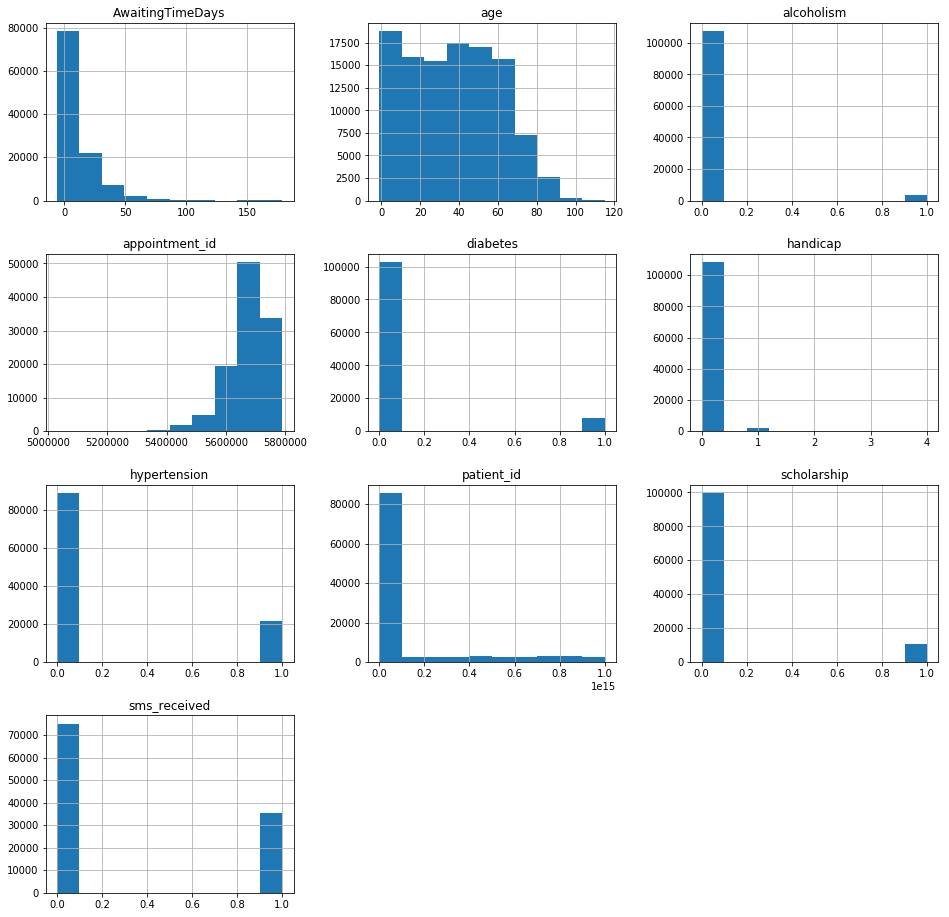

In [72]:
df.hist(figsize=(16,16));

>**Histogram observations**¶
>**age** : There are many very cilde young people in the dataset but in general the patients age is distributed evenly until 70 years and the number of patients goes drastically down for patients older than 70 years.

>**alcoholism** : Most of the patients are not alcoholics.

>**diabetes** : Most of the patients are not diabetes but more than alcoholics.

>**handicap** : There are for handicap categories but it's very smaller

>**hypertension** : Most patients do not have hypertension diagnosed but more than diabetes. .


### gender

In [73]:
# Print Unique Values

print("Unique Values in 'gender' => {}".format(df.gender.unique()))

Unique Values in 'gender' => ['F' 'M']


### scheduled_day

In [74]:

# Print Unique Values

print("Unique Values in 'scheduled_day' => {}".format(df.scheduled_day.unique()))

Unique Values in 'scheduled_day' => ['2016-04-29T00:00:00.000000000' '2016-04-27T00:00:00.000000000'
 '2016-04-26T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-04-25T00:00:00.000000000' '2016-04-20T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-04-19T00:00:00.000000000'
 '2016-04-06T00:00:00.000000000' '2016-04-18T00:00:00.000000000'
 '2016-04-11T00:00:00.000000000' '2016-04-12T00:00:00.000000000'
 '2016-04-15T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-04-05T00:00:00.000000000' '2016-04-08T00:00:00.000000000'
 '2016-04-14T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-07T00:00:00.000000000' '2016-03-17T00:00:00.000000000'
 '2016-03-30T00:00:00.000000000' '2016-03-29T00:00:00.000000000'
 '2016-03-18T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03-04T00:00:00.000000000' '2016-03-15T00:00:00.000000000'
 '2016-03-14T00:00:00.000000000' '2016-03-21T00:00:00.000000000'
 '2016-03-23T00:00:00.000000000' '2016-03-22T00:00:00.

### age

In [75]:
# Print Unique Values

print("Unique Values in 'age' => {}".format(df.age.unique()))

Unique Values in 'age' => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


Age value cannot be less than 0. I will remove all records with such values.and about age values greater than 100 . I will remove all records with age greater than 110 

In [76]:
print('Before change')
print("Patients with 'Age' less than -1 -> {}".format(df[df.age == -1].shape[0]))
print("Patients with 'Age' equal to 0 -> {}".format(df[df.age == 0].shape[0]))
print("Patients with 'Age' greater than 110 -> {}".format(df[df.age > 110].shape[0]))

df = df[(df.age >= 0) & (df.age <= 110)]
df.age.value_counts()

print('After change')
print("Patients with 'Age' less than -1 -> {}".format(df[df.age == -1].shape[0]))
print("Patients with 'Age' equal to 0 -> {}".format(df[df.age == 0].shape[0]))
print("Patients with 'Age' greater than 110 -> {}".format(df[df.age > 110].shape[0]))

Before change
Patients with 'Age' less than -1 -> 1
Patients with 'Age' equal to 0 -> 3539
Patients with 'Age' greater than 110 -> 5
After change
Patients with 'Age' less than -1 -> 0
Patients with 'Age' equal to 0 -> 3539
Patients with 'Age' greater than 110 -> 0


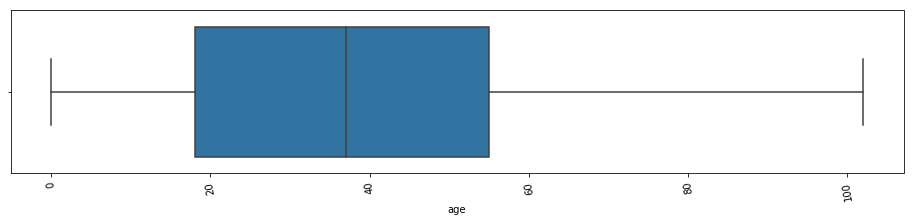

In [77]:
plt.figure(figsize=(16,3))
plt.xticks(rotation=100)
_ = sns.boxplot(x=df.age)

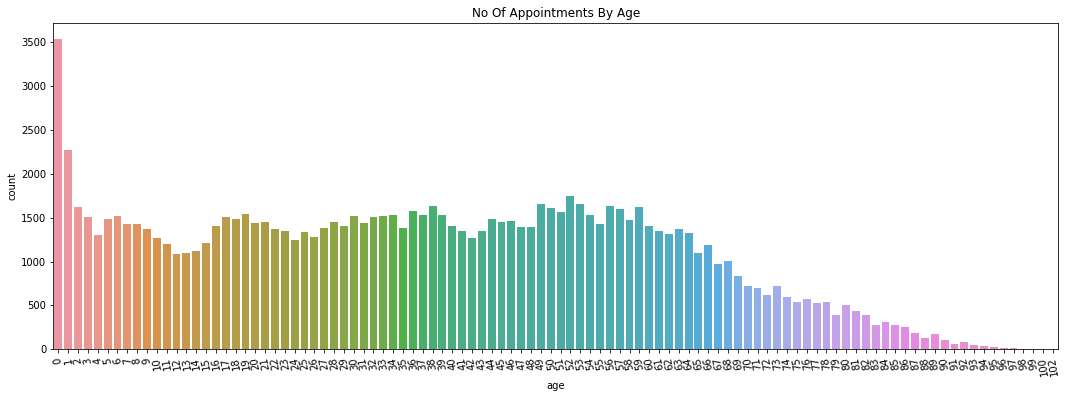

In [78]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=100)
ax = sns.countplot(x=df.age)
ax.set_title("No Of Appointments By Age")
plt.show()


The above histogram shows a peak for the infants (Babies patients of age 0). For higher age values the distribution starts to be uniform. After the age value of around 60 we see a right-skewed distribution.

### scholarship

In [79]:
## Print Unique Values
print("Unique Values in 'scholarship' => {}".format(df.scholarship.unique()))

Unique Values in 'scholarship' => [0 1]


### hypertension

In [80]:

## Print Unique Values
print("Unique Values in 'hypertension' => {}".format(df.hypertension.unique()))

Unique Values in 'hypertension' => [1 0]


### diabetes

In [81]:
## Print Unique Values
print("Unique Values in 'diabetes' => {}".format(df.diabetes.unique()))

Unique Values in 'diabetes' => [0 1]


### alcoholism

In [82]:

## Print Unique Values
print("Unique Values in 'alcoholism' => {}".format(df.alcoholism.unique()))

Unique Values in 'alcoholism' => [0 1]


### handicap

In [83]:
## Print Unique Values
print("Unique Values in 'handicap' => {}".format(df.handicap.unique()))

Unique Values in 'handicap' => [0 1 2 3 4]



The handicap column contains 4 numeric values (classes)


In [84]:
df.handicap.value_counts()

0    108284
1      2038
2       183
3        13
4         3
Name: handicap, dtype: int64

There are too many values other than 0 or 1 to consider them as typos, so there most likely is a meaning for different kinds of handicapness. I DON'T WILL BE CHANGE ANYTHING FOR NOW

### sms_received

In [85]:
## Print Unique Values
print("Unique Values in 'sms_received' => {}".format(df.sms_received.unique()))

Unique Values in 'sms_received' => [0 1]


### AwaitingTimeDays

In [86]:
## Print Unique Values
print("Unique Values in 'AwaitingTimeDays' => {}".format(df.AwaitingTimeDays.unique()))

Unique Values in 'AwaitingTimeDays' => [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  -1  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127
 111 119  74  71  82 108 110 102 122 101 105  92  97  93 107  95  -6 139
 132 179 117 146 123]


In [87]:
# Awaiting time cannot be less than 0. I am assuming that a visit cannot happen before it is scheduled.
#  see how many such values exist
print('Before change: {}'.format(df[(df.AwaitingTimeDays < 0)].AwaitingTimeDays.value_counts()))

# I will remove all records with such values.
df = df[(df.AwaitingTimeDays >= 0)]

#Check if any awaiting time days values below 0 left in the dataset
print('After change: {}'.format(df[(df.AwaitingTimeDays < 0)].AwaitingTimeDays.value_counts()))

Before change: -1    4
-6    1
Name: AwaitingTimeDays, dtype: int64
After change: Series([], Name: AwaitingTimeDays, dtype: int64)


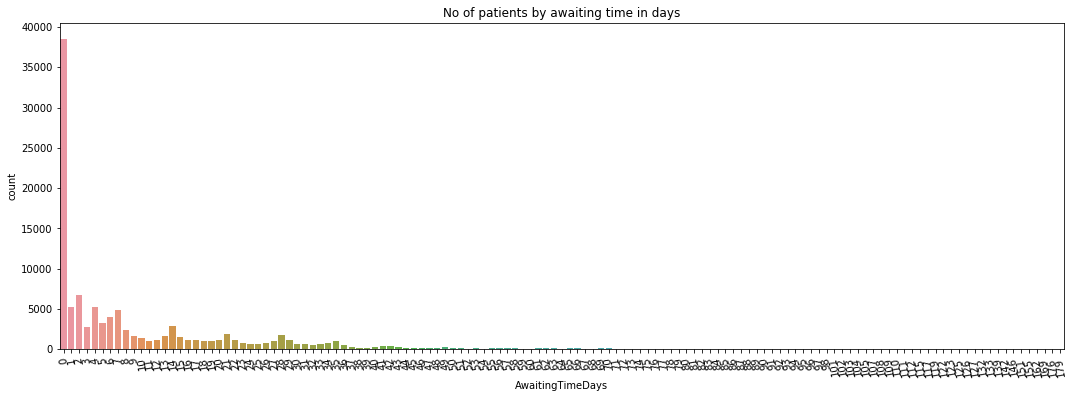

In [88]:
#See how many there are patients of each age
plt.figure(figsize=(18,6))
plt.xticks(rotation=100)
ax = sns.countplot(x=df.AwaitingTimeDays)
ax.set_title("No of patients by awaiting time in days")
plt.show()



In [89]:
# Return number of patients with AwaitingTimeDays == 0

awaiting_0 = df[(df.AwaitingTimeDays == 0)].AwaitingTimeDays.value_counts()
awaiting_0

0    38561
Name: AwaitingTimeDays, dtype: int64

In [90]:
awaiting_0_not_showed_up = len(df.query('AwaitingTimeDays  == 0 and no_show == "Yes"'))
awaiting_0_not_showed_up_ratio = int(round(awaiting_0_not_showed_up/awaiting_0[0]*100))
print('Out of all patients scheduling an appointment for the same day (in total {}), {} of patients did not show up ({}%).'.format(awaiting_0[0], 
awaiting_0_not_showed_up, 
awaiting_0_not_showed_up_ratio))



Out of all patients scheduling an appointment for the same day (in total 38561), 1792 of patients did not show up (5%).


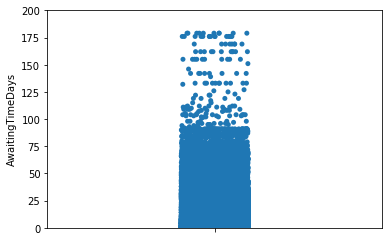

In [91]:
# It seems that most of the visits happened within 3 months from being scheduled
sns.stripplot(data = df, y = 'AwaitingTimeDays', jitter = True)
plt.ylim(0, 200)
plt.show();

### scheduled_day

Scheduling visits started on: 2015-11-10 00:00:00.
Scheduling visits ended on: 2016-06-08 00:00:00.


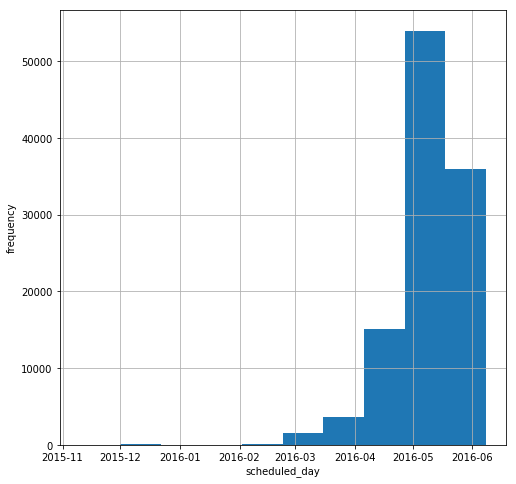

In [92]:
print('Scheduling visits started on: {}.'.format(df['scheduled_day'].min()))
print('Scheduling visits ended on: {}.'.format(df['scheduled_day'].max()))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('scheduled_day')
ax.set_ylabel('frequency')
df['scheduled_day'].hist();

### appointment_day

The distribution of appointments scheduled is left skewed. Most of the schedules were made between April and June of 2016.


Visit appointments started on: 2016-04-29 00:00:00.
Visit appointments ended on: 2016-06-08 00:00:00.


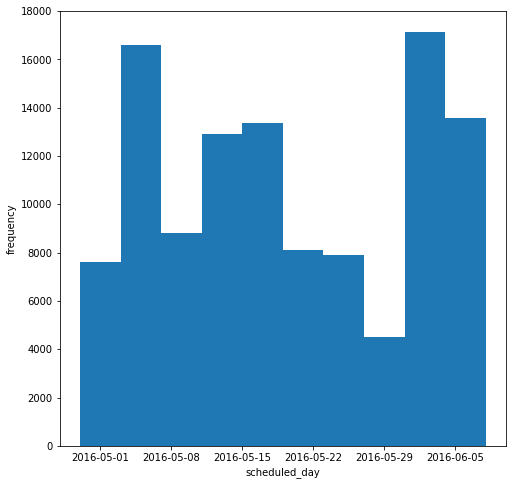

In [93]:
print('Visit appointments started on: {}.'.format(df['appointment_day'].min()))
print('Visit appointments ended on: {}.'.format(df['appointment_day'].max()))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('scheduled_day')
ax.set_ylabel('frequency')
df['appointment_day'].hist(grid=False, ax=ax);

### DWAppointment

In [94]:
# Print Unique Values
print("Unique Values in 'DWAppointment' => {}".format(df.DWAppointment.unique()))

Unique Values in 'DWAppointment' => ['Friday' 'Wednesday' 'Tuesday' 'Thursday' 'Monday' 'Saturday']


### appointment_id

In [95]:
¶#Are the appointments id unique?
# If yes, then num_unique_apps will be equal to number of all records in our dataset
number_unique_apps = len(df.appointment_id.unique())
all_dataset_rec_number = df.shape[0]
print('{} == {}'.format(number_unique_apps, all_dataset_rec_number))

SyntaxError: invalid character in identifier (<ipython-input-95-37bd94ec86ab>, line 1)

<a id='eda'></a>
## Exploratory Data Analysis


## Questions

> **1**: How many percent of patients missed their scheduled appointment?

> **2**: What is the gender distribution for show / no-show patients? 

> **3**: Are there patients with more than one appointment? If yes, what are the top 15 patients with most appointments? 

> **4**: What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

> **5**: Does Scholarship help in decreasing the amount of no-shows?


### Q1: How many percent of patients missed their scheduled appointment?

In [ ]:
allAppointments = df.shape[0]
missedAppointments = len(df.query('no_show == \'Yes\''))
missedRatio = int(round(missedAppointments/allAppointments*100))

ax = sns.countplot(x=df.no_show, data=df)
ax.set_title("Show / No-Show Patients")
plt.show();

print('{}% of appointments were missed.'.format(missedRatio))

### Q2: What is the gender distribution for show / no-show patients?

In [ ]:
allAppointments_f = len(df.loc[df['gender'] == "F"])
allAppointments_m = len(df.loc[df['gender'] == "M"])

missedAppointments_f = len(df.query('no_show == "Yes" and gender == "F"'))
missedAppointments_m = len(df.loc[(df['gender'] == "M") & (df['no_show'] == "Yes")])

missedRatio_f = int(round(missedAppointments_f/allAppointments_f*100))
missedRatio_m = int(round(missedAppointments_m/allAppointments_m*100))

ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'.format(allAppointments_f, missedAppointments_f, missedRatio_f))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(allAppointments_m, missedAppointments_m, missedRatio_m))

### Q3: Are there patients with more than one appointment? If yes, what are the top 15 patients with most appointments?

In [ ]:
df.patient_id.value_counts().iloc[0:15]


### Q4 :  What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

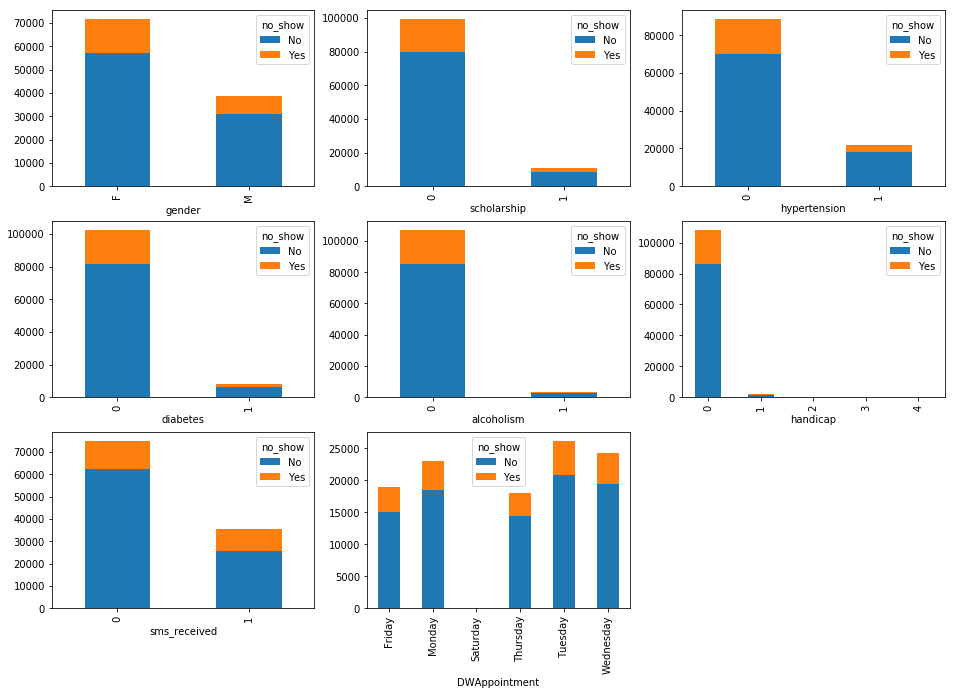

In [96]:
categorical_vars = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'DWAppointment']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 25% no-show rate for most categories.

In [97]:
## I will use two useful masks to be used in another analysis
showed = df.no_show == 'No'
notShowed = df.no_show == 'Yes'

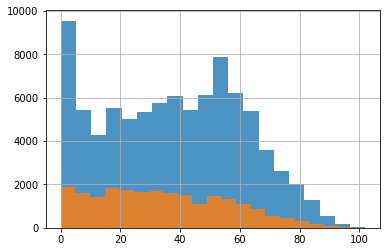

In [98]:
# look closer to numerical variables
# Age:
df.age[showed].hist(alpha=0.8, bins=20);
df.age[notShowed].hist(alpha=0.8, bins=20);

Infants show up most often then people around 50-55. But between 1-65 years old, the rate of no-shows seems to be greater 20%.

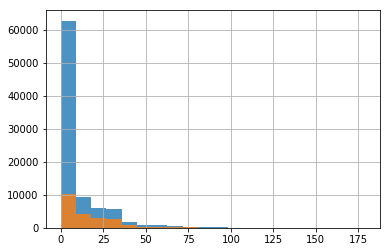

In [99]:
# Number of days between the date of scheduling an appointment and the appointment itself
df.AwaitingTimeDays[showed].hist(alpha=0.8, bins=20);
df.AwaitingTimeDays[notShowed].hist(alpha=0.8, bins=20);

The shorter waiting period the more patients show up. Patient scheduling appointments for the same day are much more likely to show up (ca. 17% of not showing up only).

### Q5 : Does Scholarship help in decreasing the amount of no-shows?

In [100]:
# first create a dataset of peple with no scholarship and then find the people with no shows from them
df[df['scholarship'] == 0]['no_show'].value_counts()

No     79922
Yes    19733
Name: no_show, dtype: int64

In [101]:
# proportion of people who did not show up even though they had no scholarship/govt funding
(df[df['scholarship'] == 0]['no_show'] == "Yes").mean()

0.19801314535146256

The mean number of people who showed up actually increased slightly when we segregated the data based on people having scholarship. This implies not having scholarship does seem to have some impact on peoples showing up on appointments. Having scholarship might be helping people to make appointments at which they do show up.

In [102]:

df[df['scholarship'] == 1]['no_show'].value_counts()

No     8283
Yes    2578
Name: no_show, dtype: int64

In [103]:
# proportion of people who did not show up and had govt scholarship

(df[df['scholarship'] == 1]['no_show'] == "Yes").mean()

0.23736304207715681

In [104]:
#The column name No-show has a hyphen and hyphen or spaces do not work in colname for queries 
#thus creating a new column for this query with same data but a different name# proportion of people who did not show up and had govt scholarship

df['No__show'] = df['no_show']
Schol_No__show = len(df.query('scholarship ==1 & No__show == "Yes"'))/len(df) *100
NoSchol_No__show = len(df.query('scholarship ==0 & No__show == "Yes"'))/len(df) *100
Schol__show = len(df.query('scholarship ==1 & No__show == "No"'))/len(df) *100
NoSchol__show = len(df.query('scholarship ==0 & No__show == "No"'))/len(df) *100

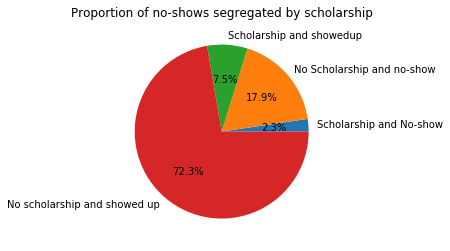

In [105]:
x_list = [Schol_No__show,NoSchol_No__show,Schol__show,NoSchol__show]
label_list = ["Scholarship and No-show", "No Scholarship and no-show", "Scholarship and showedup", "No scholarship and showed up"]
plt.axis("equal")
plt.pie(x_list,labels=label_list,autopct="%1.1f%%")
plt.title("Proportion of no-shows segregated by scholarship")
plt.show()

Pie chart does not seem to be a good chart for this visualization for these variables because it does not make clear whether scholarship (program Bolsa Família) helps or no

<a id='conclusions'></a>
## Conclusions
>I have looked into the dataset and managed a few problems like unifying names, removing wrong data. 
I have also investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one (no_show). As this was only an exploratory analysis, many potential correlations may remain uncovered. The data should be investigated further with more advanced statistical analysis and more data of patients to potentially  reveal new insights and correlations.


>**The most important findings are:**

> **1*: Scheduling visits started on 2015-11-10 and ended on 2016-06-08.

>Visit appointments started on 2016-04-29 and ended on 2016-06-08.

>The distribution of appointments among days of week (Monday-Friday) is almost equal with a little bit less visits on Thursday and Friday. There are 24 visits on Saturday and none on Sunday.

>10 days on average patients awaited for an appointment. 50% of patients waited up to 4 days and 75% up to 15 days for an appointment. The longest awaiting time was 179 days.

>Almost 40k patients scheduled their visit for the same day.
Out of all patients scheduling an appointment for the same day (in total 38561), 1792 of patients did not show up (5%).

>There are many very young people in the dataset (most of them of age 0) but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.

>The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.

>Most of the patients are not alcoholics.

>Most of the patients are not diabetes but more than alcoholics.

>There are for handicap categories with most of the people not being handicapted.

>Most patients do not have hypertension diagnosed.

>On average, 20% of appointments were missed.

>Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.

>Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%.


In [106]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0